In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("superstoreanalysis.csv")

In [44]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [46]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [47]:
data.Country.value_counts()

United States    9994
Name: Country, dtype: int64

Remove unwanted columns

In [48]:
data = data.drop(columns=['Postal Code','Country'])

In [49]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
data.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Uniqueness of Desired Columns

In [50]:
data.duplicated().value_counts()

False    9944
True       50
dtype: int64

In [52]:
data.drop_duplicates(inplace=True)

In [53]:
data.shape

(9944, 11)

In [19]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [20]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [22]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Exploratory Analysis

In [54]:
data['Profit %']=(data.Profit/data.Sales)*100
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit %
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


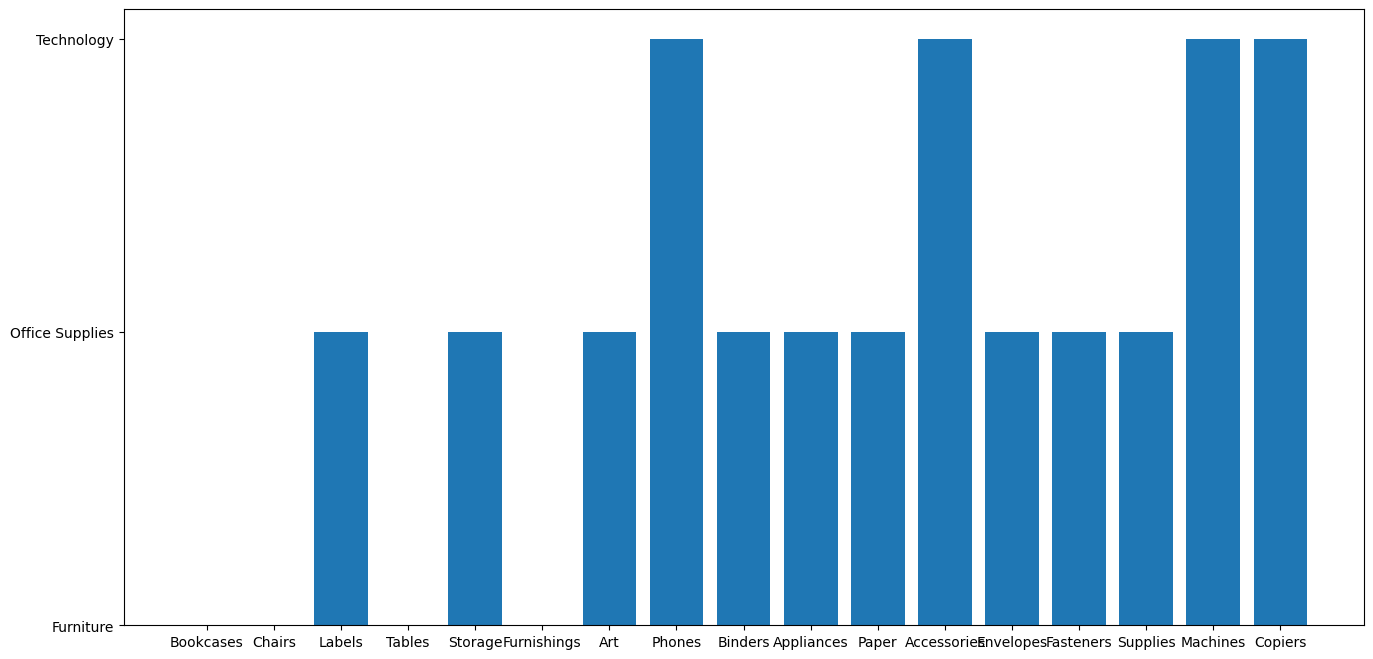

In [67]:
#Plot Graphs
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data);

# SubCategory Based

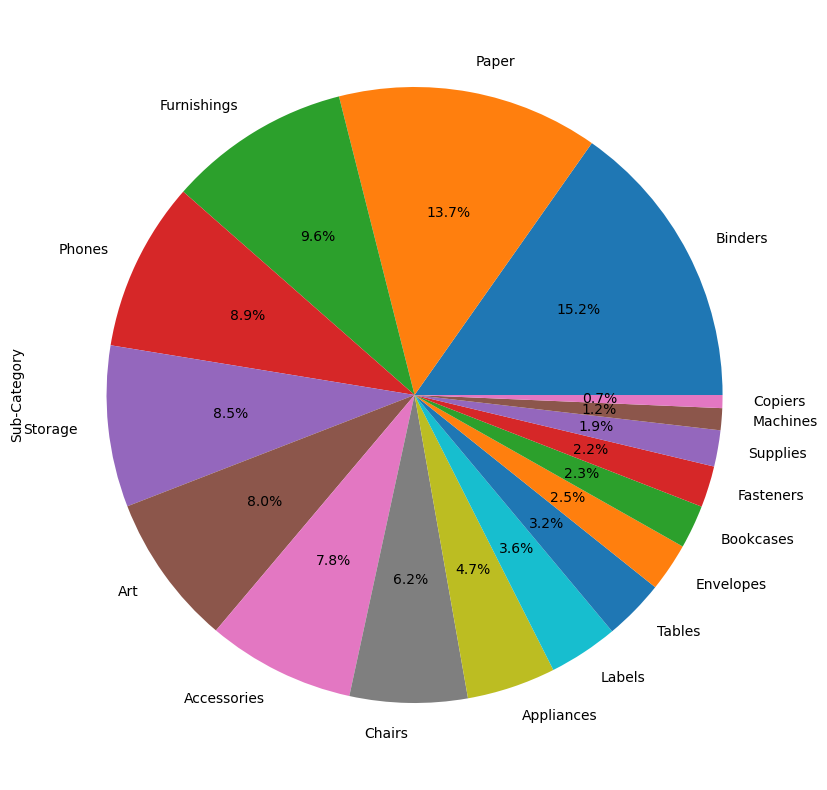

In [24]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show();

C:\Users\Meena\AppData\Local\Temp\ipykernel_25024\3226998619.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].sum().plot(kind='bar')


Text(0.5, 1.0, 'Total Profit and Sales per SC')

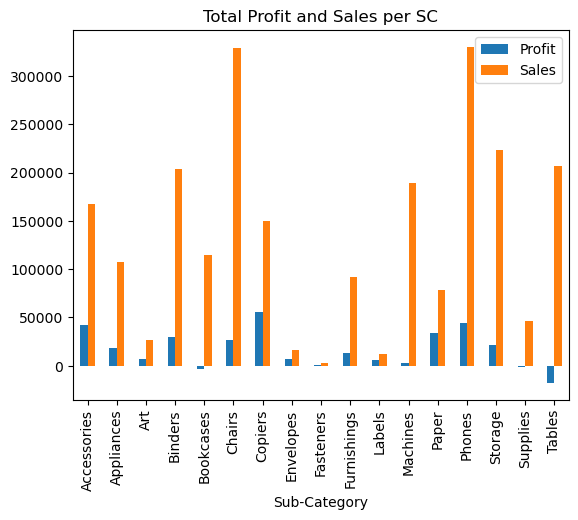

In [32]:
data.groupby('Sub-Category')['Profit','Sales'].sum().plot(kind='bar')
plt.title('Total Profit and Sales per SC')

In [36]:
df=data.groupby('Sub-Category')['Profit','Sales'].sum()

C:\Users\Meena\AppData\Local\Temp\ipykernel_25024\848709130.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=data.groupby('Sub-Category')['Profit','Sales'].sum()


In [39]:
df

,Profit,Sales
Sub-Category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6527.7870,27118.7920
Binders,30221.7633,203412.7330
Bookcases,-3472.5560,114879.9963
Chairs,26590.1663,328449.1030
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020
Fasteners,949.5182,3024.2800


Highest Profit = Copiers

Highest Selling Price = [ Chairs, Phones]

Loss = [Tables, Bookcases,Supplies]

# Segment Based Profits

In [73]:
new_data=pd.DataFrame(data.groupby(['Segment'])['Profit'].sum())
new_data

,Profit
Segment,
Consumer,133939.5218
Corporate,91911.1606
Home Office,60246.8755


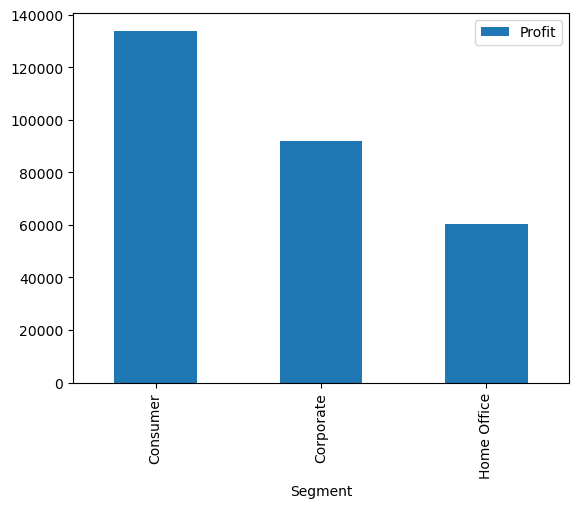

In [74]:
new_data.plot(kind="bar");

Profitable = Consumer

Loss = Home Office

Target = Consumer and Corporate

# Region Based Profits

In [78]:
dataregion=pd.DataFrame(data.groupby(['Region'])['Profit'].sum().reset_index())
dataregion

,Region,Profit
0,Central,39662.0474
1,East,91471.0909
2,South,46749.4303
3,West,108214.9893


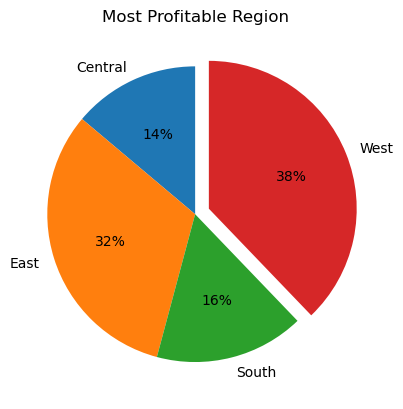

In [113]:
explode=[0,0,0,0.1]
plt.pie(dataregion.Profit,labels=dataregion.Region,startangle=90,
       autopct="%1.0f%%",explode=explode);
plt.title("Most Profitable Region");

Profit = West and East

# Highest Selling Cities 

In [102]:
city=pd.DataFrame(data.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales',ascending=False))
topcity=city.head(10)
topcity

C:\Users\Meena\AppData\Local\Temp\ipykernel_25024\1088206764.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city=pd.DataFrame(data.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales',ascending=False))


,Sales,Quantity
City,,
New York City,255841.1050,3395
Los Angeles,175296.8170,2842
Seattle,119460.2820,1578
San Francisco,112184.8130,1910
Philadelphia,108948.1090,1961
Houston,64422.7704,1454
Chicago,48500.8090,1127
San Diego,47502.1290,667
Jacksonville,44713.1830,429


In [85]:
BottomCity=city.tail(10)
BottomCity

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


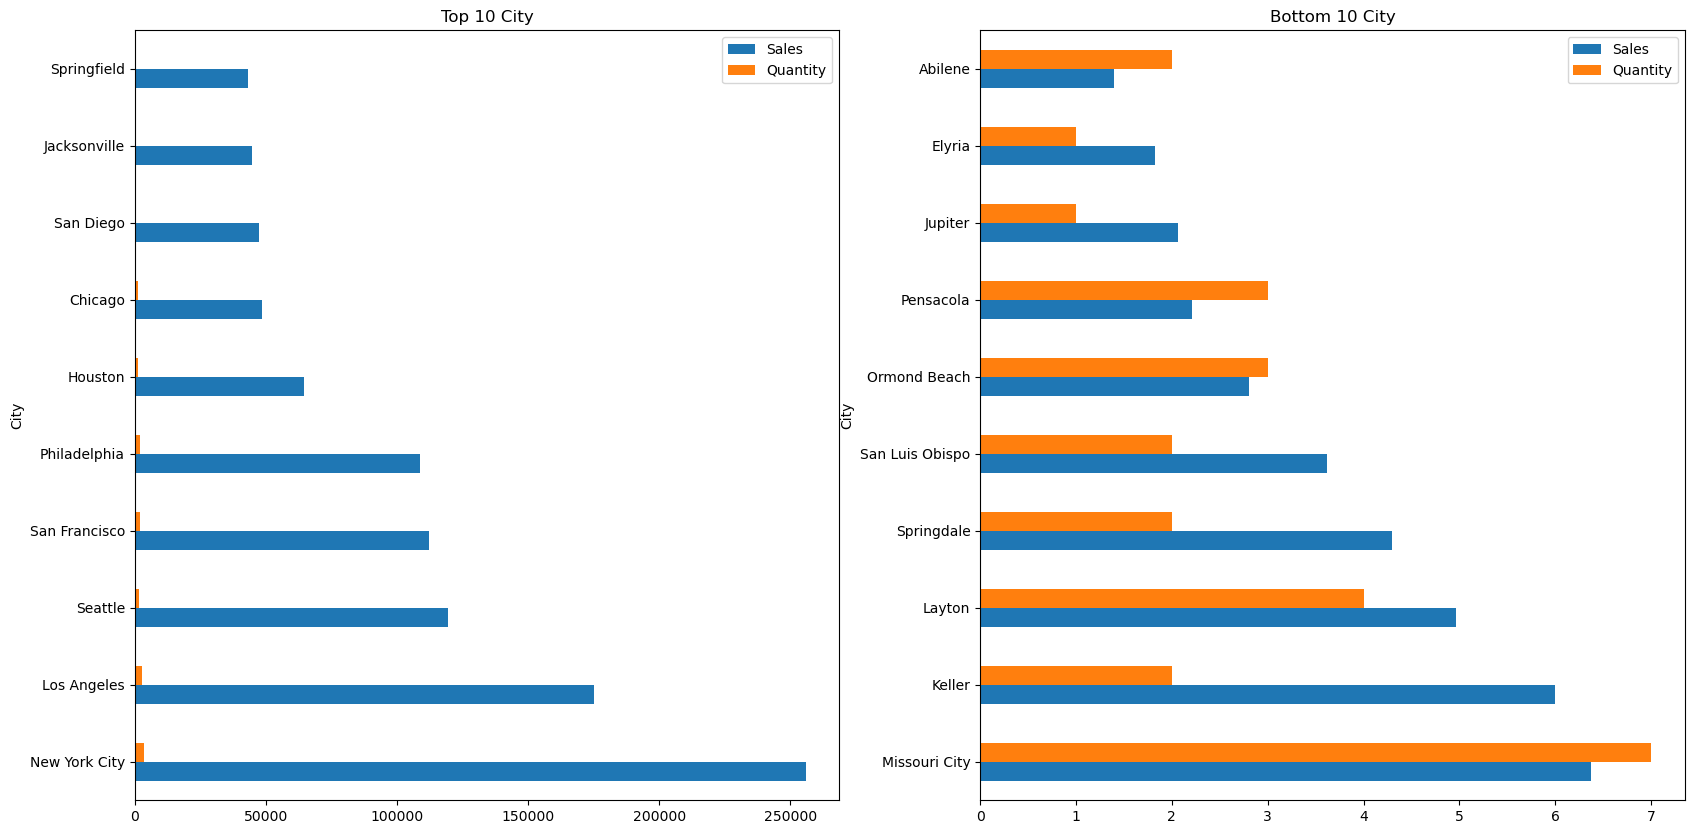

In [112]:
fig,axis=plt.subplots(1,2,figsize=(20,10))
topcity.plot(kind='barh',ax=axis[0])
axis[0].set(title="Top 10 City")
axis[0].set_yticklabels(axis[0].get_yticklabels());

BottomCity.plot(kind='barh',ax=axis[1])
axis[1].set(title="Bottom 10 City")
axis[1].set_yticklabels(axis[1].get_yticklabels());